In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("raw_tracking_dataset.csv")

In [8]:
df.head()

,ant,frame,video,colony,date,t,x,y
0,2,15405,1,1,1/11/17,20:12:17,1812,360
1,2,15406,1,1,1/11/17,20:12:17,1808,368
2,2,15407,1,1,1/11/17,20:12:17,1804,368
3,2,15408,1,1,1/11/17,20:12:17,1804,368
4,2,15409,1,1,1/11/17,20:12:17,1800,372


In [75]:
print(f"colony unique: {df.colony.unique()}")
print(f"ant unique: {df.ant.unique()}")
print(f"frame unique: {df.frame.unique()}")
print(f"video unique: {df.video.unique()}")
print(f"date unique: {df.date.unique()}")

colony unique: [1 6]
ant unique: [   2    3    4 ... 1178 1179  646]
frame unique: [15405 15406 15407 ... 46862 46863 46864]
video unique: [ 1  2  3  4  5  6  7  8  9 10 11]
date unique: ['1/11/17' '1/12/17' '1/13/17' '1/14/17' '1/15/17']


In [13]:
print(df.ant.unique())

[   2    3    4 ... 1178 1179  646]


- seperated by colony then, some days have the first colony and some the sixth
- then seperated by video
- then it seperates each ant in the video by unique number
- 

### if the length of colony 1 data and 6 data equal to total data. shows they should be the first seperator

In [19]:
len(df[df["colony"] == 1]) + len(df[df["colony"] == 6]) == len(df)

True

In [20]:
colony_6_data = df[df["colony"] == 6]
colony_1_data = df[df["colony"] == 1]

In [77]:
print(f"Total number of ants measured in colony 6: {len(colony_6_data.ant)}")
print(f"Total number of ants measured in colony 1: {len(colony_1_data.ant)}")

Total number of ants measured in colony 6: 45716
Total number of ants measured in colony 1: 1002859


In [76]:
print(f"Total number of unique ants measured in colony 6: {len(colony_6_data.ant.unique())}")
print(f"Total number of unique ants measured in colony 1: {len(colony_1_data.ant.unique())}")

Total number of unique ants measured in colony 6: 259
Total number of unique ants measured in colony 1: 1192


### second seperator is video

In [78]:
print(f"Total number of ants in video 1 in colony 1: {len(colony_1_data[colony_1_data.video == 1].ant)}")
print(f"Total number of ants in video 2 in colony 1: {len(colony_1_data[colony_1_data.video == 2].ant)}")
print(f"Total number of ants in video 3 in colony 1: {len(colony_1_data[colony_1_data.video == 3].ant)}")
print(f"Total number of ants in video 4 in colony 1: {len(colony_1_data[colony_1_data.video == 4].ant)}")
print(f"Total number of ants in video 5 in colony 1: {len(colony_1_data[colony_1_data.video == 5].ant)}")
print(f"Total number of ants in video 6 in colony 1: {len(colony_1_data[colony_1_data.video == 6].ant)}")
print(f"Total number of ants in video 7 in colony 1: {len(colony_1_data[colony_1_data.video == 7].ant)}")

Total number of ants in video 1 in colony 1: 54889
Total number of ants in video 2 in colony 1: 146480
Total number of ants in video 3 in colony 1: 141320
Total number of ants in video 4 in colony 1: 113502
Total number of ants in video 5 in colony 1: 176558
Total number of ants in video 6 in colony 1: 100329
Total number of ants in video 7 in colony 1: 79845


In [79]:
print(f"Total number of unique ants in video 1 in colony 1: {len(colony_1_data[colony_1_data.video == 1].ant.unique())}")
print(f"Total number of unique ants in video 2 in colony 1: {len(colony_1_data[colony_1_data.video == 2].ant.unique())}")
print(f"Total number of unique ants in video 3 in colony 1: {len(colony_1_data[colony_1_data.video == 3].ant.unique())}")
print(f"Total number of unique ants in video 4 in colony 1: {len(colony_1_data[colony_1_data.video == 4].ant.unique())}")
print(f"Total number of unique ants in video 5 in colony 1: {len(colony_1_data[colony_1_data.video == 5].ant.unique())}")
print(f"Total number of unique ants in video 6 in colony 1: {len(colony_1_data[colony_1_data.video == 6].ant.unique())}")
print(f"Total number of unique ants in video 7 in colony 1: {len(colony_1_data[colony_1_data.video == 7].ant.unique())}")

Total number of unique ants in video 1 in colony 1: 465
Total number of unique ants in video 2 in colony 1: 802
Total number of unique ants in video 3 in colony 1: 562
Total number of unique ants in video 4 in colony 1: 891
Total number of unique ants in video 5 in colony 1: 977
Total number of unique ants in video 6 in colony 1: 796
Total number of unique ants in video 7 in colony 1: 661


### ants in one vid are also in another

In [42]:
if set(colony_1_data[colony_1_data["video"] == 1].ant.unique()).intersection(set(colony_1_data[colony_1_data["video"] == 2].ant.unique()), set(colony_1_data[colony_1_data["video"] == 3].ant.unique()), set(colony_1_data[colony_1_data["video"] == 4].ant.unique()), set(colony_1_data[colony_1_data["video"] == 5].ant.unique()), set(colony_1_data[colony_1_data["video"] == 7].ant.unique()), set(colony_1_data[colony_1_data["video"] == 7].ant.unique())):
    print("True")

True


In [50]:
colony_6_data.video.unique()

array([1, 2, 3, 4], dtype=int64)

### only 4 videos for colony 6 while 7 for colony 1

In [80]:
print(f"Total number of unique ants in video 1 in colony 6: {len(colony_6_data[colony_6_data.video == 1].ant.unique())}")
print(f"Total number of unique ants in video 2 in colony 6: {len(colony_6_data[colony_6_data.video == 2].ant.unique())}")
print(f"Total number of unique ants in video 3 in colony 6: {len(colony_6_data[colony_6_data.video == 3].ant.unique())}")
print(f"Total number of unique ants in video 4 in colony 6: {len(colony_6_data[colony_6_data.video == 4].ant.unique())}")

Total number of unique ants in video 1 in colony 6: 4
Total number of unique ants in video 2 in colony 6: 174
Total number of unique ants in video 3 in colony 6: 105
Total number of unique ants in video 4 in colony 6: 34


In [55]:
colony_6_data[colony_6_data["video"] == 1].ant.unique()

array([14, 15, 19, 20], dtype=int64)

In [56]:
colony_6_data[colony_6_data.video == 1]

,ant,frame,video,colony,date,t,x,y
1002859,14,40330,1,6,1/15/17,19:48:26,288,816
1002860,14,40331,1,6,1/15/17,19:48:26,292,832
1002861,14,40332,1,6,1/15/17,19:48:26,320,832
1002862,14,40333,1,6,1/15/17,19:48:26,344,828
1002863,14,40334,1,6,1/15/17,19:48:26,356,828
...,...,...,...,...,...,...,...,...
1003406,20,46163,1,6,1/15/17,19:51:41,1044,232
1003407,20,46164,1,6,1/15/17,19:51:41,1044,232
1003408,20,46165,1,6,1/15/17,19:51:41,1044,236
1003409,20,46166,1,6,1/15/17,19:51:41,1036,236


### datasets will be organised by the colony and the video

In [57]:
colony_1_data_vid_1 = colony_1_data[colony_1_data.video == 1]
colony_1_data_vid_2 = colony_1_data[colony_1_data.video == 2]
colony_1_data_vid_3 = colony_1_data[colony_1_data.video == 3]
colony_1_data_vid_4 = colony_1_data[colony_1_data.video == 4]
colony_1_data_vid_5 = colony_1_data[colony_1_data.video == 5]
colony_1_data_vid_6 = colony_1_data[colony_1_data.video == 6]
colony_1_data_vid_7 = colony_1_data[colony_1_data.video == 7]

In [62]:
print(f"rows of data for colony 1 video 1: {len(colony_1_data_vid_1)}")
print(f"rows of data for colony 1 video 2: {len(colony_1_data_vid_2)}")
print(f"rows of data for colony 1 video 3: {len(colony_1_data_vid_3)}")
print(f"rows of data for colony 1 video 4: {len(colony_1_data_vid_4)}")
print(f"rows of data for colony 1 video 5: {len(colony_1_data_vid_5)}")
print(f"rows of data for colony 1 video 6: {len(colony_1_data_vid_6)}")
print(f"rows of data for colony 1 video 7: {len(colony_1_data_vid_7)}")

rows of data for colony 1 video 1: 54889
rows of data for colony 1 video 2: 146480
rows of data for colony 1 video 3: 141320
rows of data for colony 1 video 4: 113502
rows of data for colony 1 video 5: 176558
rows of data for colony 1 video 6: 100329
rows of data for colony 1 video 7: 79845


In [64]:
colony_6_data_vid_1 = colony_6_data[colony_6_data.video == 1]
colony_6_data_vid_2 = colony_6_data[colony_6_data.video == 2]
colony_6_data_vid_3 = colony_6_data[colony_6_data.video == 3]
colony_6_data_vid_4 = colony_6_data[colony_6_data.video == 4]

In [66]:
print(f"rows of data for colony 6 video 1: {len(colony_6_data_vid_1)}")
print(f"rows of data for colony 6 video 2: {len(colony_6_data_vid_2)}")
print(f"rows of data for colony 6 video 3: {len(colony_6_data_vid_3)}")
print(f"rows of data for colony 6 video 4: {len(colony_6_data_vid_4)}")

rows of data for colony 6 video 1: 552
rows of data for colony 6 video 2: 22490
rows of data for colony 6 video 3: 15102
rows of data for colony 6 video 4: 7572


### only 4 unique ants in colony 6 video 1

In [72]:
colony_6_data_vid_1.ant.unique()

array([14, 15, 19, 20], dtype=int64)

### simple plot for colony 6 video 1 ant 14

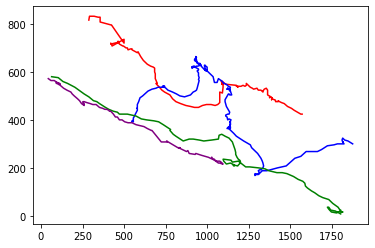

In [74]:
plt.plot(colony_6_data_vid_1[colony_6_data_vid_1.ant == 14].x, colony_6_data_vid_1[colony_6_data_vid_1.ant == 14].y, color = "red")
plt.plot(colony_6_data_vid_1[colony_6_data_vid_1.ant == 15].x, colony_6_data_vid_1[colony_6_data_vid_1.ant == 15].y, color = "blue")
plt.plot(colony_6_data_vid_1[colony_6_data_vid_1.ant == 19].x, colony_6_data_vid_1[colony_6_data_vid_1.ant == 19].y, color = "green")
plt.plot(colony_6_data_vid_1[colony_6_data_vid_1.ant == 20].x, colony_6_data_vid_1[colony_6_data_vid_1.ant == 20].y, color = "purple")